# <center> **MPO Time Evolution**

## **Packages**

In [ ]:
import matplotlib.pyplot as plt

from variational_algorithms.tensor_networks.tn_algorithms import SamplingMPS, TimeEvolution, TensorOperations
from variational_algorithms.tensor_networks.tensor_networks import TensorOperations

from variational_algorithms.use_cases.maxcut.instances import MaxCut_Instance
from variational_algorithms.use_cases.maxcut.cost_function import MaxCut_CostFunction

from variational_algorithms.tensor_networks.tensor_networks import TensorOperations

import numpy as np

## **Example with 6 qubits for Erdos Renyi - Max Cut**

In [ ]:
# We define type of problem and size

N = 6

instance = MaxCut_Instance(N)
instance.random_erdos_renyi(pb_conexion = 1)
cost_function = MaxCut_CostFunction(instance)
n_qubits = cost_function.num_bin_vars

ham_problem = cost_function.total_hamiltonian

# We obtain the exact value by brute force
# Warning: Use this method only for small problems

solutions = instance.brute_force()[0][2]
print('Energy ground state:', solutions)

Energy ground state: -9


In [ ]:
chi = 32

tevo = TimeEvolution(N, cost_function.total_hamiltonian, chi)

dt = 0.01 # By setting a real dt we perform the imaginary time evolution
n_steps = 200
result = tevo.run(dt, n_steps, order=1)

In [4]:
# We can get the probabilities of each state by projecting the final state (not efficient, it should only be used for small system sizes)
probs_list = []
for i in range(2**n_qubits):
    sol_string = bin(i)[2:].zfill(N)
    prob = abs(TensorOperations(result.tensors).proyection_state(sol_string))**2
    probs_list.append((sol_string, prob))

probs_list = sorted(probs_list, key=lambda tup: tup[1], reverse=True)
print(probs_list)

[('011001', 0.04866309817423186), ('010110', 0.048663098174229986), ('011010', 0.04866309817422716), ('111000', 0.04866309817422684), ('101001', 0.04866309817422659), ('000111', 0.048663098174226364), ('010101', 0.04866309817422622), ('001011', 0.0486630981742258), ('101100', 0.04866309817422541), ('101010', 0.04866309817422525), ('011100', 0.04866309817422521), ('100011', 0.04866309817422499), ('010011', 0.04866309817422268), ('001110', 0.04866309817422185), ('001101', 0.048663098174221445), ('110001', 0.04866309817422099), ('100110', 0.048663098174219675), ('100101', 0.04866309817421931), ('110010', 0.04866309817421929), ('110100', 0.04866309817421838), ('011011', 0.0008912660235583275), ('100001', 0.0008912660235582652), ('100010', 0.0008912660235581967), ('101110', 0.0008912660235581423), ('111010', 0.0008912660235581235), ('110011', 0.0008912660235581046), ('000101', 0.0008912660235581032), ('111100', 0.0008912660235580877), ('011000', 0.0008912660235580649), ('011101', 0.00089126

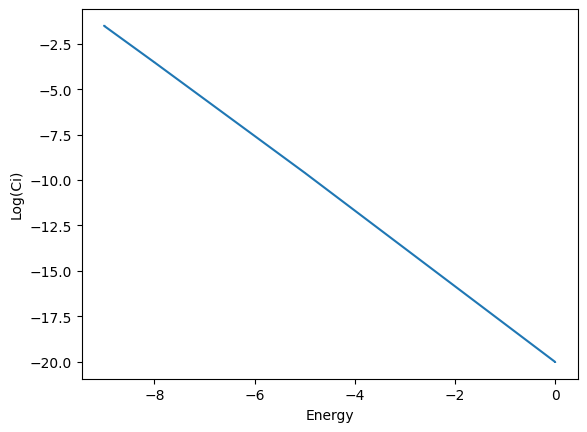

In [9]:
# Only as a validation we check that the final MPS state corresponds to a Gibbs state
# This validation strategy is valid only for small problems.
# For larger problems, the SamplingMPS class can be used to obtain the pr

energy_x_list = []
pb_log_y_list = []

for i in range(len(probs_list)):
    
    energy_x_list.append(cost_function.check_cost_binary(str(probs_list[i][0])))
    pb_log_y_list.append(np.log(np.sqrt(probs_list[i][1])))
    
plt.plot(energy_x_list, pb_log_y_list)
plt.xlabel('Energy')
plt.ylabel('Log(Ci)')
plt.show()

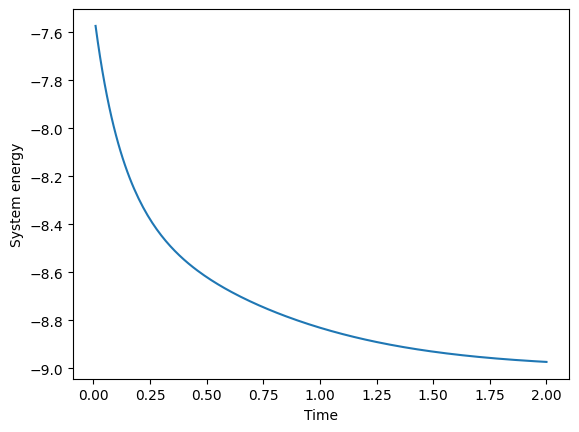

In [ ]:
# We can see how the energy of the system has changed over time during the evolution

plt.plot([abs(dt)*(i+1) for i in range(len(tevo.energies))], tevo.energies)
plt.xlabel('Time')
plt.ylabel('System energy')
plt.show()